# Youtube Video Analysis

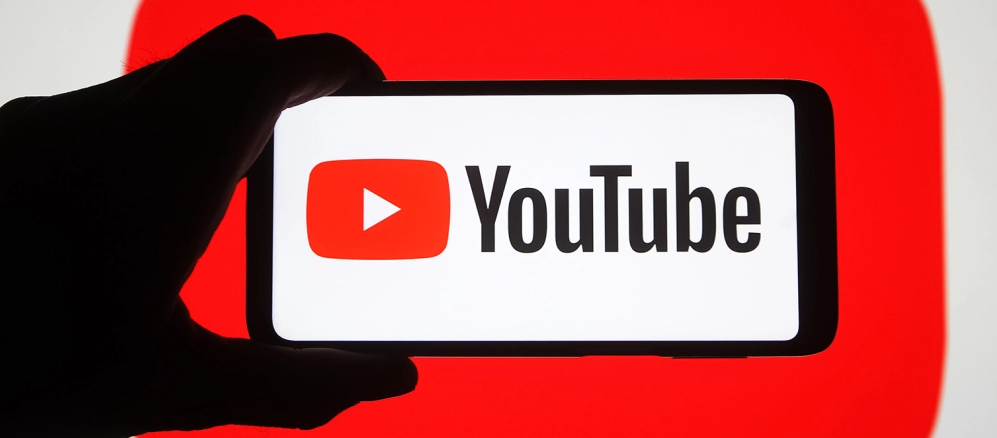

* In this exciting YouTube Video Analysis project, we dive into the world of data and Python to uncover valuable insights from the vast and dynamic universe of YouTube videos.

* YouTube is the second-largest search engine and a goldmine of diverse content, making it an excellent platform for data analysis.

* In this project we use Python's powerful libraries and techniques to process, and visualize YouTube video data. By the end of the project, we will have a comprehensive understanding of data analysis and how it can be applied to derive meaningful information from online media.

#### Key highlights of the project include:

* **Data Collection:** The dataset for the project is taken from  Kaggle.

* **Data Preprocessing:** Discover the significance of data preprocessing and cleansing to ensure accurate and meaningful analysis. We'll cover techniques like handling missing data, converting data types, and dealing with duplicates etc..

* **Exploratory Data Analysis (EDA):** We'll create insightful visualizations to gain a better understanding of the dataset.

* **Note:** Prior knowledge of Python programming basics is recommended for a better understanding of this project concepts.

## Importing the required libraries:

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

import datetime


## Importing the dataset:

In [2]:
df=pd.read_csv("IN_youtube_trending_data.csv")
df.head(2)

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...


## Overview of the dataset:

In [3]:
# Shape of the dataset:
df.shape

(152593, 16)

It contains 1,52,593 rows and 16 columns. This is really a huge dataset.

In [4]:
# Columns in the dataset:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [5]:
# Statistical analysis of the dataset:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count
count,152593.000000,1.525930e+05,1.525930e+05,1.525930e+05,1.525930e+05
mean,20.928005,3.148897e+06,1.695163e+05,3.842192e+03,9.988589e+03
std,5.958950,7.553347e+06,4.454034e+05,9.236131e+04,8.708685e+04
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,20.000000,4.568570e+05,1.737800e+04,0.000000e+00,4.080000e+02
50%,24.000000,1.100973e+06,5.066700e+04,3.830000e+02,1.330000e+03
75%,24.000000,2.801690e+06,1.464980e+05,1.931000e+03,4.613000e+03
max,29.000000,2.644074e+08,1.611524e+07,1.234147e+07,6.738565e+06


## Data Cleaning:

In [6]:
## Dropping irrelevant columns:
df.drop(['channelId','thumbnail_link','description'], axis=1, inplace=True)
df.head(2)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,False,False
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,False,False


### Using json file to add the category column to the dataset replacing the categoryId column:

In [7]:
# Importing the category json file:
categories=pd.read_json("IN_category_id.json")
categories.head()

,kind,etag,items
0,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'IfW..."
1,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '5XG..."
2,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'HCj..."
3,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': 'ra8..."
4,youtube#videoCategoryListResponse,kBCr3I9kLHHU79W4Ip5196LDptI,"{'kind': 'youtube#videoCategory', 'etag': '7mq..."


In [8]:
categories['items'].head(2)

0    {'kind': 'youtube#videoCategory', 'etag': 'IfW...
1    {'kind': 'youtube#videoCategory', 'etag': '5XG...
Name: items, dtype: object

In [9]:
categories['items'][0]

{'kind': 'youtube#videoCategory',
 'etag': 'IfWa37JGcqZs-jZeAyFGkbeh6bc',
 'id': '1',
 'snippet': {'title': 'Film & Animation',
  'assignable': True,
  'channelId': 'UCBR8-60-B28hp2BmDPdntcQ'}}

In [10]:
categories['items'][0]['id']

'1'

In [11]:
categories['items'][0]['snippet']['title']

'Film & Animation'

In [12]:
categ={}
for i in categories['items']:
    categ[i['id']]=i['snippet']['title']
    
categ

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [13]:
category=[]
for i in df['categoryId']:
    x=str(i)
    if x in categ.keys():
        y=categ[x]
        category.append(y)
    else:
        category.append('Others')

In [14]:
df['Category']=category
df.head(2)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,Category
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,False,False,Entertainment
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,False,False,Music


In [15]:
# Value counts of 'Category' column:
df['Category'].value_counts()

Entertainment           58179
People & Blogs          25269
Music                   20571
Comedy                  12640
Gaming                   8154
Science & Technology     5286
Howto & Style            5029
News & Politics          4373
Sports                   4191
Education                3544
Film & Animation         3347
Travel & Events           956
Autos & Vehicles          894
Pets & Animals             87
Others                     73
Name: Category, dtype: int64

### DataTypes of each column:

In [16]:
df.dtypes

video_id             object
title                object
publishedAt          object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
comments_disabled      bool
ratings_disabled       bool
Category             object
dtype: object

In [17]:
# Changing the datatypes of "publishedAt" and "trending_date" columns:

df["publishedAt"]=pd.to_datetime(df["publishedAt"])
df["trending_date"]=pd.to_datetime(df["trending_date"])

In [18]:
df.dtypes

video_id                          object
title                             object
publishedAt          datetime64[ns, UTC]
channelTitle                      object
categoryId                         int64
trending_date        datetime64[ns, UTC]
tags                              object
view_count                         int64
likes                              int64
dislikes                           int64
comment_count                      int64
comments_disabled                   bool
ratings_disabled                    bool
Category                          object
dtype: object

### Checking for null values:

In [19]:
df.isna().sum()

video_id             0
title                0
publishedAt          0
channelTitle         1
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
comments_disabled    0
ratings_disabled     0
Category             0
dtype: int64

In [20]:
df.dropna(inplace=True)
df.isna().sum()

video_id             0
title                0
publishedAt          0
channelTitle         0
categoryId           0
trending_date        0
tags                 0
view_count           0
likes                0
dislikes             0
comment_count        0
comments_disabled    0
ratings_disabled     0
Category             0
dtype: int64

### Let's check the no.of records for a random video: x-KbnJ9fvJc

In [21]:
df[df['video_id']=='x-KbnJ9fvJc']

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,Category
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11 09:00:11+00:00,Rehaan Records,10,2020-08-12 00:00:00+00:00,[None],11308046,655450,33242,405146,False,False,Music
172,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11 09:00:11+00:00,Rehaan Records,10,2020-08-13 00:00:00+00:00,[None],16844981,789270,43188,439365,False,False,Music
352,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11 09:00:11+00:00,Rehaan Records,10,2020-08-14 00:00:00+00:00,[None],21852388,886361,49294,458680,False,False,Music
531,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11 09:00:11+00:00,Rehaan Records,10,2020-08-15 00:00:00+00:00,[None],25444773,954012,53042,471979,False,False,Music
714,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11 09:00:11+00:00,Rehaan Records,10,2020-08-16 00:00:00+00:00,[None],28178762,1001984,55619,480777,False,False,Music
923,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11 09:00:11+00:00,Rehaan Records,10,2020-08-17 00:00:00+00:00,[None],30858899,1045071,57827,486989,False,False,Music
1140,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11 09:00:11+00:00,Rehaan Records,10,2020-08-18 00:00:00+00:00,[None],33335727,1083213,59896,490656,False,False,Music
1375,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11 09:00:11+00:00,Rehaan Records,10,2020-08-19 00:00:00+00:00,[None],35541762,1113572,61646,493561,False,False,Music
1618,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11 09:00:11+00:00,Rehaan Records,10,2020-08-20 00:00:00+00:00,[None],37585253,1140444,63188,498505,False,False,Music


In [22]:
df[df['video_id']=='x-KbnJ9fvJc']['video_id'].count()

9

Same video can be there multiple times in dataset as the video can stay in trending for many consecutive days.

In [23]:
# No.of.unique videos:
df['video_id'].nunique()

46294

Though there are **152593** entries, no.of unique videos are: **46294**

### Gathering final views before exiting from Trending. This gives the total views, likes and comments of the video:

In [24]:
df.sort_values(by='view_count', ascending=False, inplace=True)
df.head(2)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,Category
52057,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21 03:46:13+00:00,HYBE LABELS,10,2021-05-30 00:00:00+00:00,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021542,150990,6738565,False,False,Music
3619,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,Big Hit Labels,10,2020-08-30 00:00:00+00:00,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,253995993,16115240,756696,6249727,False,False,Music


In [25]:
data = df.drop_duplicates(subset='video_id', keep='first')
data.head(2)

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,Category
52057,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21 03:46:13+00:00,HYBE LABELS,10,2021-05-30 00:00:00+00:00,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021542,150990,6738565,False,False,Music
3619,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,Big Hit Labels,10,2020-08-30 00:00:00+00:00,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,253995993,16115240,756696,6249727,False,False,Music


In [26]:
data.shape

(46294, 14)

## Data Analysis:

## 1. Channel Analysis:

### Top 20 Channels with most no.of.videos:

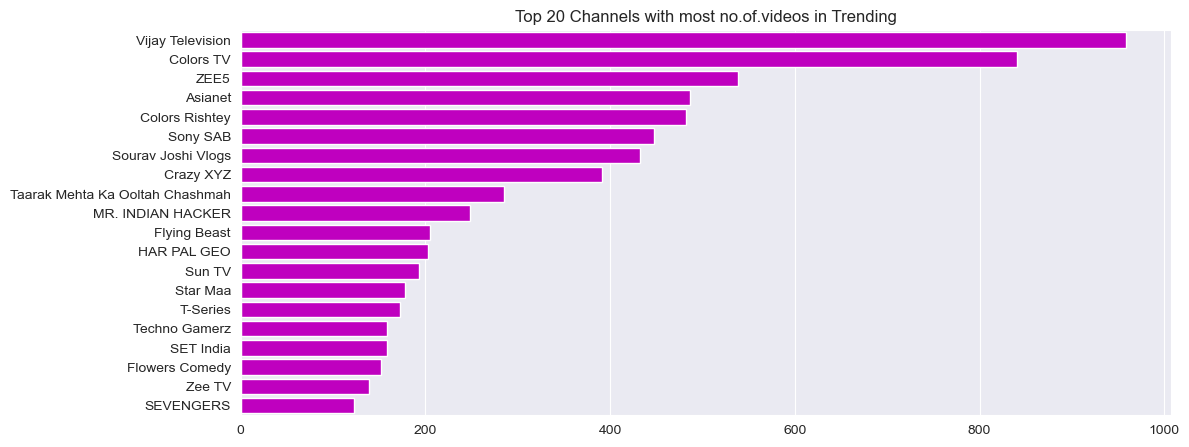

In [27]:
plt.figure(figsize=(12,5))

plt.title("Top 20 Channels with most no.of.videos in Trending")
sns.barplot(x=data['channelTitle'].value_counts().head(20).values,
            y=data['channelTitle'].value_counts().head(20).index,
            color='m',
            saturation=1)
plt.show()

### Top 10 Channels with most number of view_count, comment_count, likes, dislikes:

In [28]:
channel_group = data.groupby(by='channelTitle').sum()[['view_count','comment_count','likes','dislikes']].reset_index()
channel_group

,channelTitle,view_count,comment_count,likes,dislikes
0,#RohiL Fitness Yug,743384,162,13186,1491
1,1 Million Views Tamil,32106174,3485,2939399,13810
2,1.1 Gaming,1757843,4425,82112,7601
3,10 Mint Records,1124702,5250,103128,2244
4,10TV Entertainment,1298853,638,29820,242
...,...,...,...,...,...
4000,ਪੰਜਾਬੀ ਲੋਕ Punjabi Lok,1235977,3162,38447,1583
4001,తెలుగు రైతుబడి,2095810,191,86143,0
4002,ಉದ್ಯೋಗ ಮಿತ್ರ,23332,91,884,59
4003,ആവൂസ് avoosss family,17460076,830,450360,0


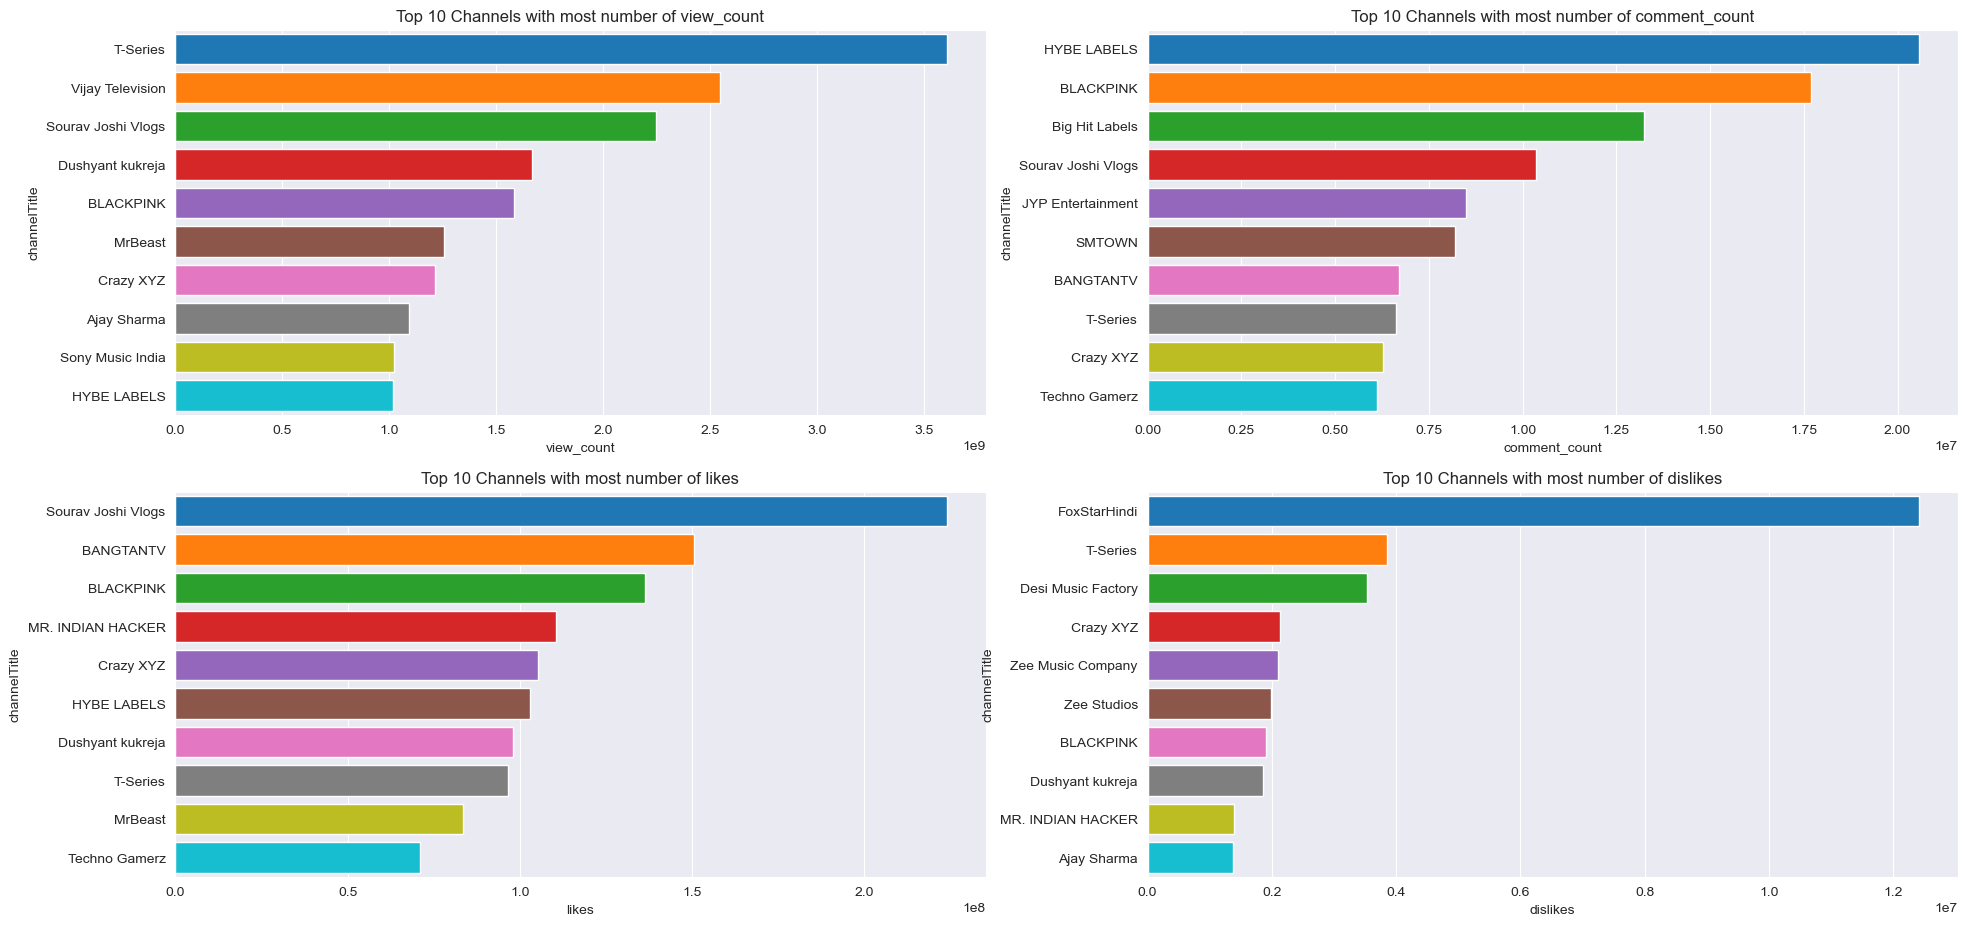

In [29]:
def Top10_Channels(index,count):
    plt.subplot(2,2,index)
    plt.title("Top 10 Channels with most number of "+count)
    sns.barplot(x=channel_group.sort_values(by=count, ascending=False)[count].head(10), 
            y=channel_group.sort_values(by=count, ascending=False)['channelTitle'].head(10),
            saturation=1)

plt.figure(figsize=(23,11))
Top10_Channels(1,'view_count')
Top10_Channels(2,'comment_count')
Top10_Channels(3,'likes')
Top10_Channels(4,'dislikes')

1. T-series seems to be most viewed channel in India.
2. Sourav Joshi vlogs are present in each of the top contenders of views,likes and comments.
3. FoxStarHindi leads the dislikes section.
4. T-series with only being on in views, and not in likes and comments. But finds itself in Disliked section.

## 2. Categoty Analysis:

### Top Categories with most no.of.videos:

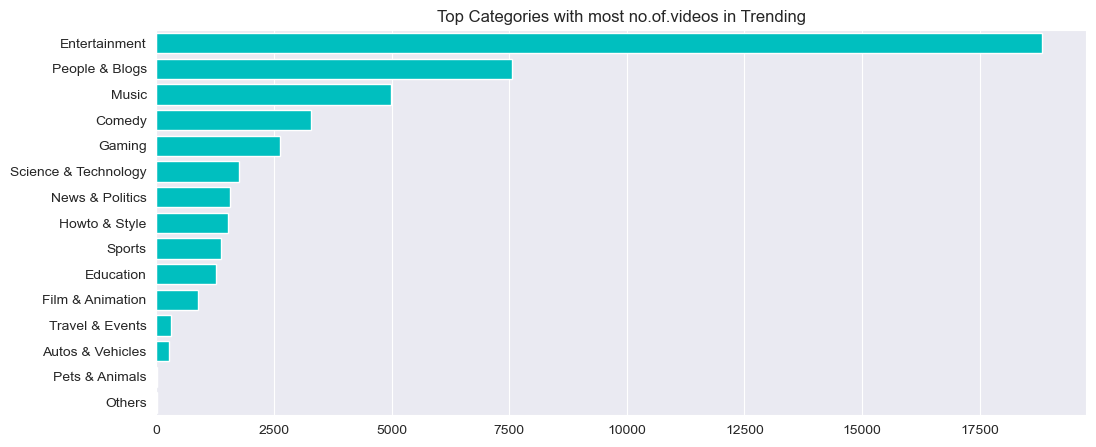

In [30]:
plt.figure(figsize=(12,5))
plt.title("Top Categories with most no.of.videos in Trending")
sns.barplot(x=data['Category'].value_counts().values,
            y=data['Category'].value_counts().index,
            color='c',
            saturation=1)

plt.show()

### Top Categories with most number of view_count, comment_count, likes, dislikes:

In [31]:
category_group = data.groupby(by='Category').sum()[['view_count','comment_count','likes','dislikes']].reset_index()
category_group

,Category,view_count,comment_count,likes,dislikes
0,Autos & Vehicles,406558072,415788,20035514,407200
1,Comedy,9694596165,17219247,642567871,7348410
2,Education,1970796950,4039701,116473344,1468695
3,Entertainment,48004512563,62034194,2031051479,48974941
4,Film & Animation,2882587134,4177745,93430980,3239950
5,Gaming,5197723936,18989423,450644206,4342309
6,Howto & Style,2521392914,3398208,143084726,1975857
7,Music,29323320877,157855586,1371756948,31857059
8,News & Politics,1533432090,3012019,29184441,3136659
9,Others,25416144,21970,1597673,13501


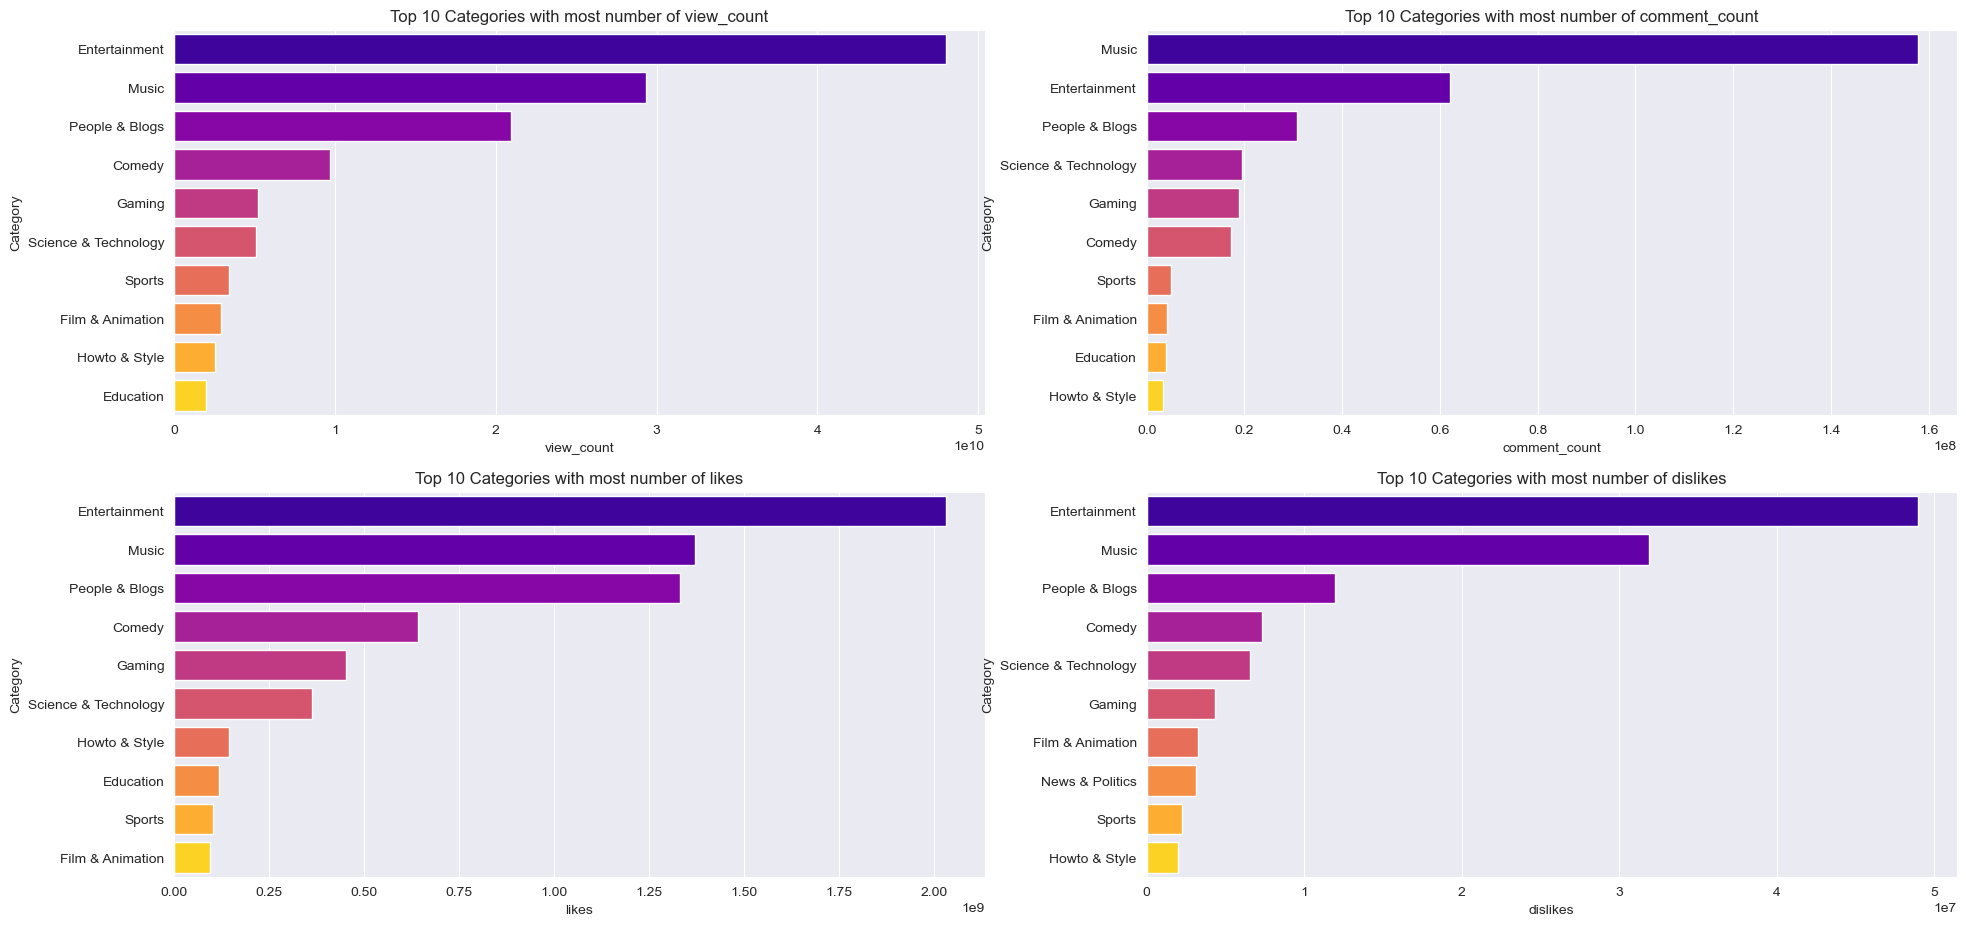

In [32]:
def Top10_category(index,count):
    plt.subplot(2,2,index)
    plt.title("Top 10 Categories with most number of "+count)
    sns.barplot(x=category_group.sort_values(by=count, ascending=False)[count].head(10), 
            y=category_group.sort_values(by=count, ascending=False)['Category'].head(10),
            palette='plasma', 
            saturation=1)
    
plt.figure(figsize=(23,11))
Top10_category(1,'view_count')
Top10_category(2,'comment_count')
Top10_category(3,'likes')
Top10_category(4,'dislikes')

1. Entertainment, Music and People & Blogs are dominating all four sections.

### Usually, In most cases, viewers just watch the video and turn to other video without Commenting, Liking or Disliking.But if they responded to a video then it signifies something.

### Let's create a like%, dislike% and comment%  columns which signifies the public response to a video:

In [33]:
category_group['like%'] = round((category_group['likes']/category_group['view_count'])*100, 3)
category_group['dislike%'] = round((category_group['dislikes']/category_group['view_count'])*100, 3)
category_group['comment%'] = round((category_group['comment_count']/category_group['view_count'])*100, 3)

category_group

,Category,view_count,comment_count,likes,dislikes,like%,dislike%,comment%
0,Autos & Vehicles,406558072,415788,20035514,407200,4.928,0.100,0.102
1,Comedy,9694596165,17219247,642567871,7348410,6.628,0.076,0.178
2,Education,1970796950,4039701,116473344,1468695,5.910,0.075,0.205
3,Entertainment,48004512563,62034194,2031051479,48974941,4.231,0.102,0.129
4,Film & Animation,2882587134,4177745,93430980,3239950,3.241,0.112,0.145
5,Gaming,5197723936,18989423,450644206,4342309,8.670,0.084,0.365
6,Howto & Style,2521392914,3398208,143084726,1975857,5.675,0.078,0.135
7,Music,29323320877,157855586,1371756948,31857059,4.678,0.109,0.538
8,News & Politics,1533432090,3012019,29184441,3136659,1.903,0.205,0.196
9,Others,25416144,21970,1597673,13501,6.286,0.053,0.086


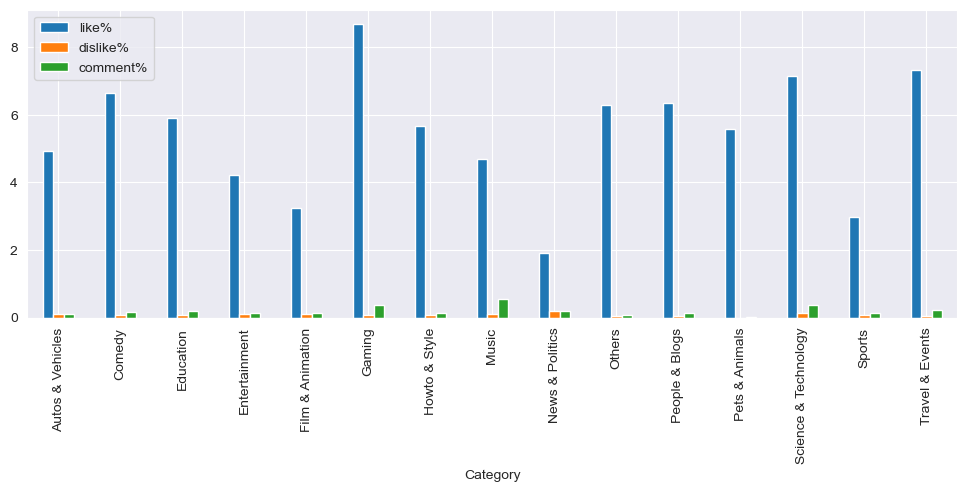

In [34]:
category_group.plot(x='Category', y=['like%','dislike%','comment%'], kind='bar', figsize=(12,4))
plt.show()

All the categories have more likes than dislikes and comments.

#### Categories with more like%, dislike% and comment%:

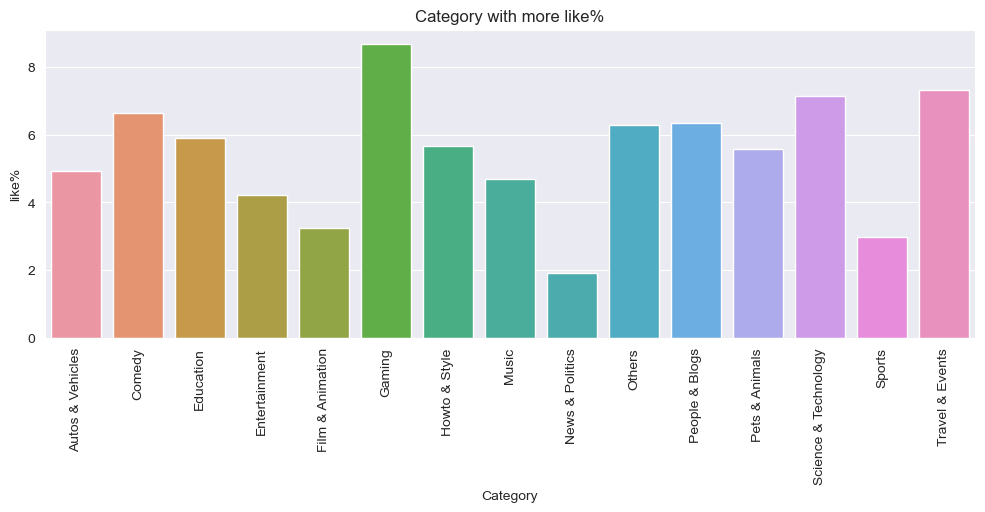

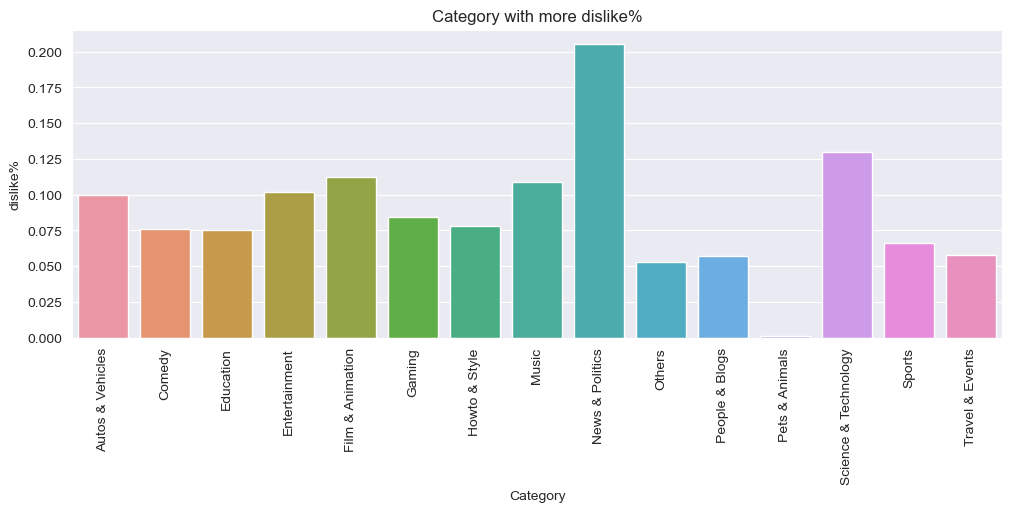

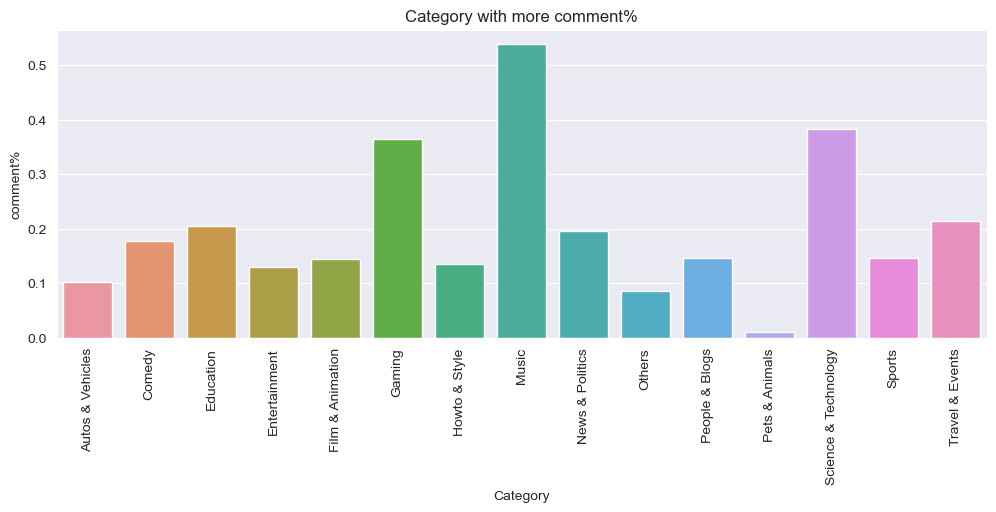

In [35]:
def cate_res(b):
    plt.figure(figsize=(12,4))
    plt.title("Category with more "+b)
    plt.xticks(rotation=90)
    sns.barplot(x='Category', y=b, data=category_group)
    plt.show()

    
cate_res('like%')
cate_res('dislike%')
cate_res('comment%')

1. **Gaming** category receives more likes.
2. **News & Politics** category receives more dislikes.
3. **Music** has the most comments.

## 3. Trending Analysis:

### Top 25 Videos with most number of trending days:

In [36]:
trending_days = df.groupby(by='video_id').count().reset_index()[['video_id','trending_date']]
trending_days = trending_days.sort_values(by='trending_date',ascending=False).head(25)
trending_days = trending_days.rename(columns={'trending_date':'#days'})
trending_days

,video_id,#days
45271,y_RHQ4mBDKA,19
15533,KVh4KtUSW3A,18
38659,pYDdDIdiSFY,18
13545,Hjj9nrjvpZo,17
16508,LtLJRNBHOKc,17
38054,oiBif8SefIg,16
2447,2OtgYcd83Qg,16
37026,nFjVlf2r9_Q,16
8634,AzOvsmpQVKM,16
12762,GbwpvjAEZv0,16


### Top 25 videos with most number of trending days (Channel  and Category wise ):

In [37]:
def chan():
    listk=list(data['video_id'])
    listv=list(data['channelTitle'])
    res = {listk[i]: listv[i] for i in range(len(listk))}

    channel=[]
    for i in list(trending_days['video_id']):
        if i in res.keys():
            j=res[i]
            channel.append(j)
    return channel

In [38]:
def cate():
    listk=list(data['video_id'])
    listv=list(data['Category'])
    res = {listk[i]: listv[i] for i in range(len(listk))}

    category=[]
    for i in list(trending_days['video_id']):
        if i in res.keys():
            j=res[i]
            category.append(j)
    return category

In [39]:
trending_days['channelTitle']=chan()
trending_days['Category']=cate()
trending_days

,video_id,#days,channelTitle,Category
45271,y_RHQ4mBDKA,19,T-Series,Music
15533,KVh4KtUSW3A,18,VYRLOriginals,Music
38659,pYDdDIdiSFY,18,INDIA EAT MANIA,Entertainment
13545,Hjj9nrjvpZo,17,Suyash Vlogs,Entertainment
16508,LtLJRNBHOKc,17,ashish chanchlani vines,Comedy
38054,oiBif8SefIg,16,Rachit Rojha,Entertainment
2447,2OtgYcd83Qg,16,Netflix India,Entertainment
37026,nFjVlf2r9_Q,16,Saregama Music,Music
8634,AzOvsmpQVKM,16,T-Series,Music
12762,GbwpvjAEZv0,16,Triggered Insaan,Comedy


### Top 30 Channels with most number of trending days:

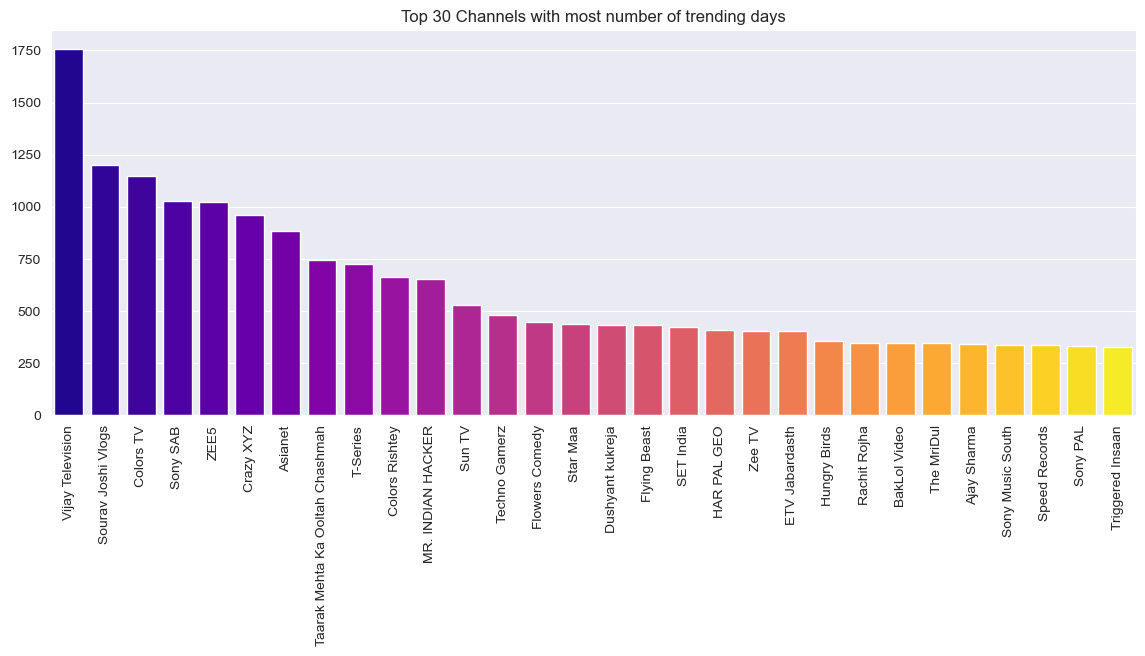

In [40]:
plt.figure(figsize=(14,5))
plt.title("Top 30 Channels with most number of trending days")
plt.xticks(rotation=90)
sns.barplot(x=df['channelTitle'].value_counts().head(30).index, 
            y=df['channelTitle'].value_counts().head(30).values,
            palette='plasma',
            saturation=1)
plt.show()

### Top Categories with most number of trending days:

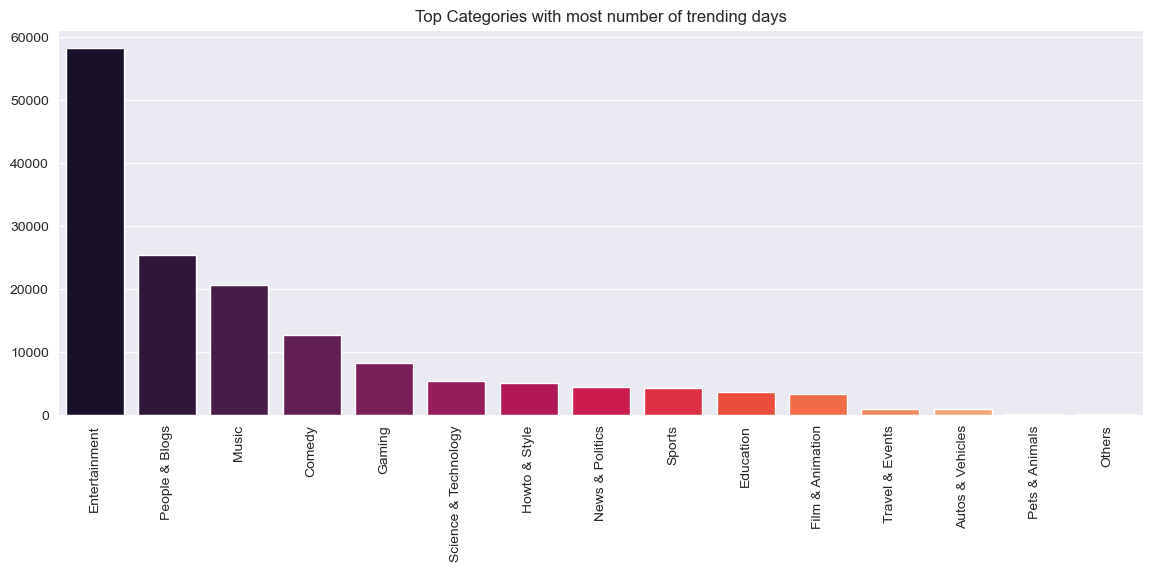

In [41]:
plt.figure(figsize=(14,5))
plt.title("Top Categories with most number of trending days")
plt.xticks(rotation=90)
sns.barplot(x=df['Category'].value_counts().index, 
            y=df['Category'].value_counts().values,
            palette='rocket',
            saturation=1)
plt.show()

### Number of days took for a video to get into trending:

In [42]:
# data of a videos before entering into trending:

df.sort_values(by='view_count', ascending=True, inplace=True)
data_bef = df.drop_duplicates(subset='video_id', keep='first')
data_bef.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,Category
98148,Isim0ysZ6X4,Stephen Hawking's 80th Birthday,2022-01-07 18:40:13+00:00,GoogleDoodles,1,2022-01-09 00:00:00+00:00,[None],0,0,0,0,True,True,Film & Animation
47058,hAxqygRdM4g,Earth Day 2021 Doodle,2021-04-21 11:00:14+00:00,GoogleDoodles,1,2021-04-24 00:00:00+00:00,[None],0,0,0,0,True,True,Film & Animation
75052,BxOEj8ZeX2g,Tim Bergling's 32nd Birthday,2021-09-07 12:00:08+00:00,GoogleDoodles,1,2021-09-12 00:00:00+00:00,[None],0,0,0,0,True,True,Film & Animation
17317,hHvXxuB2pNU,IPL 2020 | IPL 2020 Important 40 Question | Dr...,2020-11-11 00:30:05+00:00,Study In Hindi,27,2020-11-11 00:00:00+00:00,study in hindi|IPL 2020 IPL 2020 Important 40 ...,15402,2099,30,84,False,False,Education
2760,tNSmXwfTrAk,FDC & SDC ಪರೀಕ್ಷೆಗಳ ಕುರಿತು ಹೊರಬಂತು ಪ್ರಮುಖವಾದ ಮ...,2020-08-25 12:06:38+00:00,ಉದ್ಯೋಗ ಮಿತ್ರ,27,2020-08-26 00:00:00+00:00,[None],16775,785,47,85,False,False,Education


#### Let's create a column which calculates no.days took for the video to be in Trending. 0 being less than 24hrs

In [43]:
release = list(data_bef['publishedAt'])
start = list(data_bef['trending_date'])

# Subtracting 'publishedAt' colum from 'trending_date' column.
# This gives us the no.of.days taken for a video to go trending.
days_taken = [ start[i]-release[i] for i in range(len(start)) ]

data_bef['days_taken']=days_taken

In [44]:
# Taking only days and ignoring time:
days_taken=[]
for i in list(data_bef['days_taken'].astype(str).str.split()):
    x=i[0]
    days_taken.append(x)

In [45]:
# '-1' is replaced with '0' as the time taken is less than a day:
for i in range(len(days_taken)):
    if days_taken[i]=='-1':
        days_taken[i]='0'

In [46]:
data_bef['days_taken']=days_taken
data_bef['days_taken']=pd.to_numeric(data_bef['days_taken'])
data_bef.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,Category,days_taken
98148,Isim0ysZ6X4,Stephen Hawking's 80th Birthday,2022-01-07 18:40:13+00:00,GoogleDoodles,1,2022-01-09 00:00:00+00:00,[None],0,0,0,0,True,True,Film & Animation,1
47058,hAxqygRdM4g,Earth Day 2021 Doodle,2021-04-21 11:00:14+00:00,GoogleDoodles,1,2021-04-24 00:00:00+00:00,[None],0,0,0,0,True,True,Film & Animation,2
75052,BxOEj8ZeX2g,Tim Bergling's 32nd Birthday,2021-09-07 12:00:08+00:00,GoogleDoodles,1,2021-09-12 00:00:00+00:00,[None],0,0,0,0,True,True,Film & Animation,4
17317,hHvXxuB2pNU,IPL 2020 | IPL 2020 Important 40 Question | Dr...,2020-11-11 00:30:05+00:00,Study In Hindi,27,2020-11-11 00:00:00+00:00,study in hindi|IPL 2020 IPL 2020 Important 40 ...,15402,2099,30,84,False,False,Education,0
2760,tNSmXwfTrAk,FDC & SDC ಪರೀಕ್ಷೆಗಳ ಕುರಿತು ಹೊರಬಂತು ಪ್ರಮುಖವಾದ ಮ...,2020-08-25 12:06:38+00:00,ಉದ್ಯೋಗ ಮಿತ್ರ,27,2020-08-26 00:00:00+00:00,[None],16775,785,47,85,False,False,Education,0


#### No.of.days taken  Vs  No.of.videos

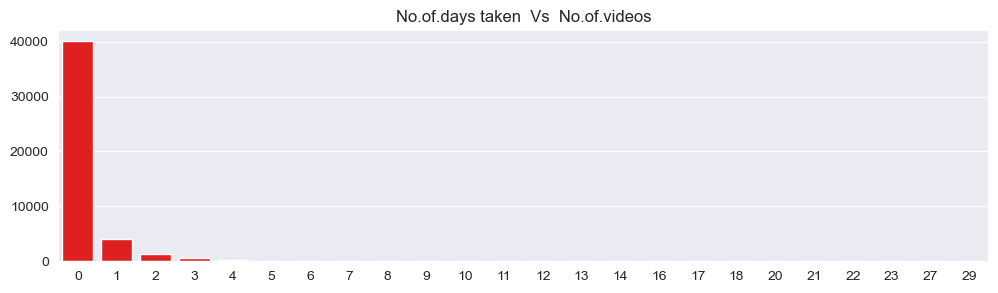

0     40057
1      4037
2      1305
3       549
4       184
5        79
6        30
10        9
9         6
7         6
Name: days_taken, dtype: int64

In [47]:
plt.figure(figsize=(12,3))

plt.title("No.of.days taken  Vs  No.of.videos")
sns.barplot(x=data_bef['days_taken'].value_counts().index,
        y=data_bef['days_taken'].value_counts().values,
        color='r')
plt.show()
data_bef['days_taken'].value_counts().head(10)

* Nearly **40,000** videos of **46,294** videos comes to trending in lessthan **a day**
* So, we can say that average time taken for all categories and channels to get into trending is lessthan a day

## 4. Further Analysis:

## Analysis on comments_disabled column:

False    45867
True       427
Name: comments_disabled, dtype: int64

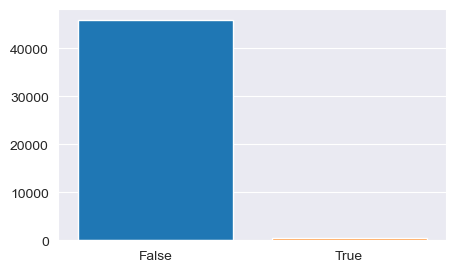

In [48]:
plt.figure(figsize=(5,3))
sns.barplot(x=data['comments_disabled'].value_counts().index,
            y=data['comments_disabled'].value_counts().values,
            saturation=1)

data['comments_disabled'].value_counts()


* Majority of videos are comments enabled for viewers to comment on the videos
* Very less number of videos are comment disabled

### categories with more comments disabled videos

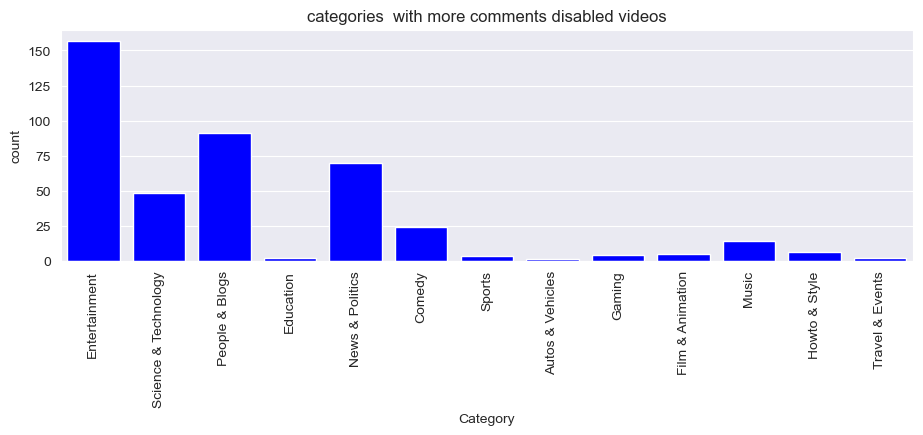

In [49]:
plt.figure(figsize=(11,3))
plt.title("categories  with more comments disabled videos")
plt.xticks(rotation=90)
sns.countplot(x=data[data['comments_disabled']==True]['Category'], color='blue', saturation=1)
plt.show()

* **Entertainment** category has more comments disabled videos than other categories followed by **people & Blogs**, **News & Politics** and **Science & Technology**. 

### Top 30 Channels with more comments disabled videos

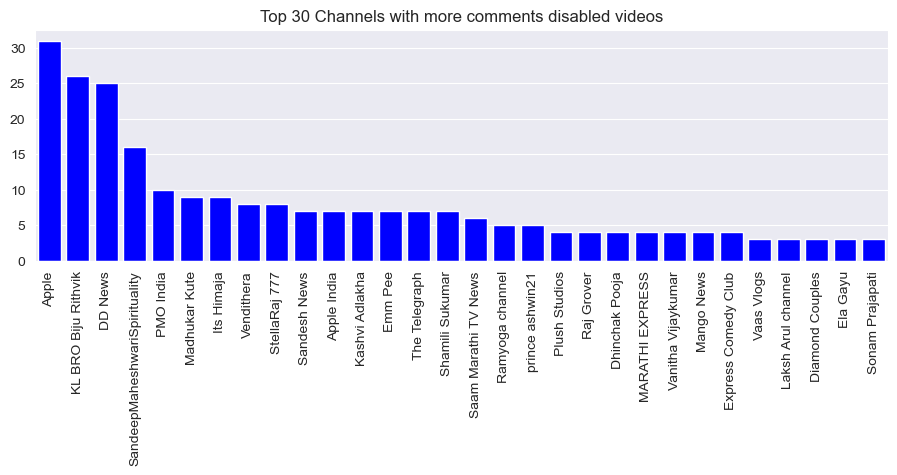

In [50]:
plt.figure(figsize=(11,3))
plt.title("Top 30 Channels with more comments disabled videos")
plt.xticks(rotation=90)
sns.barplot(x=data[data['comments_disabled']==True]['channelTitle'].value_counts().head(30).index, 
            y=data[data['comments_disabled']==True]['channelTitle'].value_counts().head(30).values,
            color='blue',
            saturation=1)
plt.show()

* **Apple** has more comments disabled videos than other channels.

## Analysis on ratings_disabled column:

False    45730
True       564
Name: ratings_disabled, dtype: int64

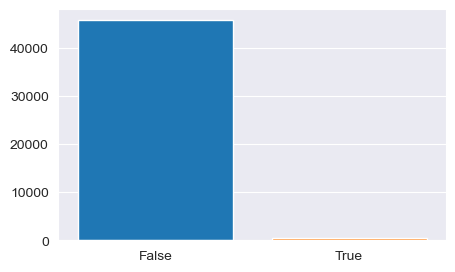

In [51]:
plt.figure(figsize=(5,3))
sns.barplot(x=data['ratings_disabled'].value_counts().index,
            y=data['ratings_disabled'].value_counts().values,
            saturation=1)

data['ratings_disabled'].value_counts()

* Majority of videos are rating enabled for viewers to comment on the videos
* Very less number of videos arerating disabled

### categories with more ratings disabled videos

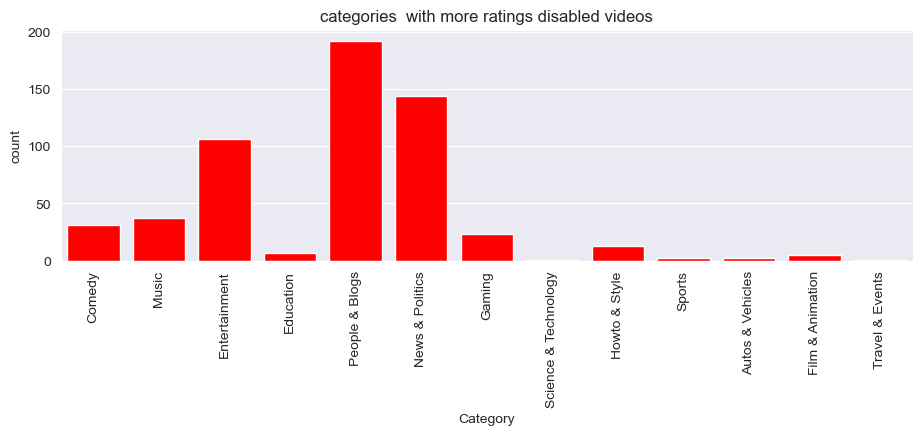

In [52]:
plt.figure(figsize=(11,3))
plt.title("categories  with more ratings disabled videos")
plt.xticks(rotation=90)
sns.countplot(x=data[data['ratings_disabled']==True]['Category'], color='red', saturation=1)
plt.show()

 * **People & Blogs** category has more ratings disabled videos than other categories followed by , **News & Politics** and **Entertainment**.

### Top 30 Channels with more ratings disabled videos

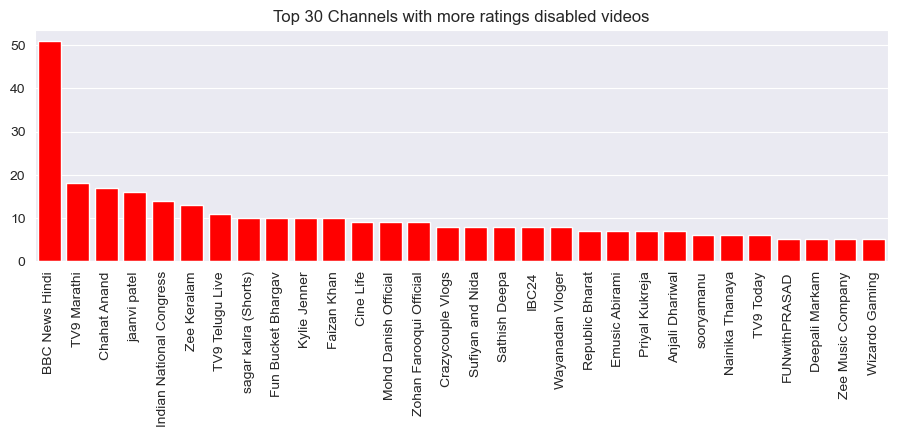

In [53]:
plt.figure(figsize=(11,3))
plt.title("Top 30 Channels with more ratings disabled videos")
plt.xticks(rotation=90)
sns.barplot(x=data[data['ratings_disabled']==True]['channelTitle'].value_counts().head(30).index, 
            y=data[data['ratings_disabled']==True]['channelTitle'].value_counts().head(30).values,
            color='red',
            saturation=1)
plt.show()

* **BBC News Hindi** has more ratings disabled videos than other channels.

## Yearwise number of Videos published which were trending:

In [54]:
Published_year=[]

for i in list(data['publishedAt']):
    x=i.year
    Published_year.append(x)

In [55]:
data['Published_year']=Published_year
data.head()

,video_id,title,publishedAt,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,Category,Published_year
52057,WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,2021-05-21 03:46:13+00:00,HYBE LABELS,10,2021-05-30 00:00:00+00:00,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,264407389,16021542,150990,6738565,False,False,Music,2021
3619,gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,2020-08-21 03:58:10+00:00,Big Hit Labels,10,2020-08-30 00:00:00+00:00,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,253995993,16115240,756696,6249727,False,False,Music,2020
64049,DUwlGduupRI,Filhaal2 Mohabbat | Akshay Kumar Ft Nupur Sano...,2021-07-06 09:30:02+00:00,DM - Desi Melodies,10,2021-07-16 00:00:00+00:00,filhall 2|Filhaal 2|Filhaal|mohabbat|Mohabbat ...,202091414,3997842,122432,327015,False,False,Music,2021
143385,gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,2022-08-19 04:00:13+00:00,BLACKPINK,10,2022-08-25 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,187922090,11640133,0,3160681,False,False,Music,2022
4735,vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2020-08-28 04:00:11+00:00,BLACKPINK,10,2020-09-05 00:00:00+00:00,YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블...,184778248,11795683,879354,2736021,False,False,Music,2020


2021    20475
2022    18116
2020     7703
Name: Published_year, dtype: int64

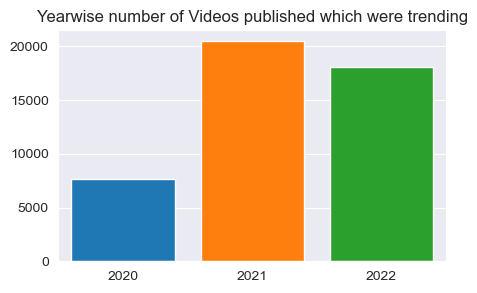

In [56]:
plt.figure(figsize=(5,3))
plt.title("Yearwise number of Videos published which were trending")
sns.barplot(x=data['Published_year'].value_counts().index,
            y=data['Published_year'].value_counts().values,
            saturation=1)

data['Published_year'].value_counts()

## Most watched video:

### Top 10 most watched video

In [57]:
data[['video_id','title','view_count']].set_index('video_id').head(10)

,title,view_count
video_id,,
WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,264407389
gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,253995993
DUwlGduupRI,Filhaal2 Mohabbat | Akshay Kumar Ft Nupur Sano...,202091414
gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,187922090
vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,184778248
CuklIb9d3fI,BTS (방탄소년단) 'Permission to Dance' Official MV,162473728
awkkyBH2zEo,LISA - 'LALISA' M/V,161848202
Qah9sSIXJqk,KGF Chapter2 TEASER |Yash|Sanjay Dutt|Raveena ...,156704924
ia6fRSeK8I0,jai shree ram 🚩#shorts #ashortaday,155975017


### Most watched video year wise

In [58]:
data.drop_duplicates(subset='Published_year', keep='first')[['title','Published_year','view_count']].set_index('Published_year')

,title,view_count
Published_year,,
2021,BTS (방탄소년단) 'Butter' Official MV,264407389
2020,BTS (방탄소년단) 'Dynamite' Official MV,253995993
2022,BLACKPINK - ‘Pink Venom’ M/V,187922090


### Most watched video category wise

In [59]:
data.drop_duplicates(subset='Category', keep='first')[['title','Category','view_count']].set_index('Category')

,title,view_count
Category,,
Music,BTS (방탄소년단) 'Butter' Official MV,264407389
Entertainment,KGF Chapter2 TEASER |Yash|Sanjay Dutt|Raveena ...,156704924
Education,jai shree ram 🚩#shorts #ashortaday,155975017
People & Blogs,Paytm IPL 2021 Ad - The Salon (English),141191928
Pets & Animals,Oddly satisfying 🤪🤪🤪 Kids don’t try at home #t...,92597901
News & Politics,Watch the uncensored moment Will Smith smacks ...,91180111
Comedy,OMG Hot burger! 😂 #shorts Best video by MoniLina,84994444
Film & Animation,KGF Chapter 2 Trailer|Hindi|Yash|Sanjay Dutt|R...,78319334
Gaming,Money Plinko Challenge! 💰 #shorts,72699576


## Most Liked Video:

### Top 10 most liked video

In [60]:
data.sort_values(by='likes',ascending=False)[['video_id','title','likes']].head(10).set_index('video_id')

,title,likes
video_id,,
gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,16115240
WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,16021542
CuklIb9d3fI,BTS (방탄소년단) 'Permission to Dance' Official MV,12225971
vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,11795683
gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,11640133
awkkyBH2zEo,LISA - 'LALISA' M/V,11534039
-5q5mZbe3V8,BTS (방탄소년단) 'Life Goes On' Official MV,11405033
0e3GPea1Tyg,"$456,000 Squid Game In Real Life!",10656330
kXpOEzNZ8hQ,BTS (방탄소년단) 'Yet To Come (The Most Beautiful M...,9366425


### Most liked video year wise

In [61]:
d1=data.sort_values(by='likes',ascending=False).drop_duplicates(subset='Published_year', keep='first')
d1[['Published_year','title','likes']].set_index('Published_year')

,title,likes
Published_year,,
2020,BTS (방탄소년단) 'Dynamite' Official MV,16115240
2021,BTS (방탄소년단) 'Butter' Official MV,16021542
2022,BLACKPINK - ‘Pink Venom’ M/V,11640133


### Most liked video category wise

In [62]:
d2=data.sort_values(by='likes',ascending=False).drop_duplicates(subset='Category', keep='first')
d2[['Category','title','likes']].set_index('Category')

,title,likes
Category,,
Music,BTS (방탄소년단) 'Dynamite' Official MV,16115240
Entertainment,"$456,000 Squid Game In Real Life!",10656330
People & Blogs,Wakt wakt ki baat h 😎🔥 #shorts #bewafa,8988055
Education,jai shree ram 🚩#shorts #ashortaday,8196855
Comedy,नींबू पानी नहीं मिलेगा 😱😂 | Kaamwali Bai - Pa...,4702368
Pets & Animals,Oddly satisfying 🤪🤪🤪 Kids don’t try at home #t...,4564339
Howto & Style,Betiyaan kisi se kam nahi hoti || Gulshan kalr...,4002304
Gaming,Kill Chori ft. Shraddha Kapoor and Bhuvan Bam ...,3597161
Film & Animation,KGF Chapter 2 Trailer|Hindi|Yash|Sanjay Dutt|R...,3298598


## Most disliked video:

### Top 10 most disliked video

In [63]:
data.sort_values(by='dislikes',ascending=False)[['video_id','title','dislikes']].head(10).set_index('video_id')

,title,dislikes
video_id,,
Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,12341474
1RwQlgS4zQI,Khaali Peeli | Teaser | Ishaan | Ananya Panday...,1733752
OExRBGfhLKc,Prime Minister Narendra Modi's Mann Ki Baat wi...,1229004
HARdHQb1Li4,Chocolate - Tony Kakkar ft. Riyaz Aly & Avneet...,1152531
PHw3Sia7KtY,"Beyonse Sharma Jayegi - Khaali Peeli | Ishaan,...",1098465
vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,879354
gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,756696
DMlWjiVZRQk,Tehas Nehas - Khaali Peeli | Ishaan & Ananya |...,401622
eD2S1UUL0s4,Ishq Kamaal – Sadak 2 | Javed Ali | Suniljeet-...,354290


### Most liked video year wise

In [64]:
d3=data.sort_values(by='dislikes',ascending=False).drop_duplicates(subset='Published_year', keep='first')
d3[['Published_year','title','dislikes']].set_index('Published_year')

,title,dislikes
Published_year,,
2020,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,12341474
2021,"KANTA LAGA - Tony Kakkar, Yo Yo Honey Singh, N...",257340
2022,Jatt Saab || FULL VIDEO || Sippy Gill | Mr Pen...,0


### Most liked video category wise

In [65]:
d4=data.sort_values(by='dislikes',ascending=False).drop_duplicates(subset='Category', keep='first')
d4[['Category','title','dislikes']].set_index('Category')

,title,dislikes
Category,,
Entertainment,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,12341474
Film & Animation,Khaali Peeli | Teaser | Ishaan | Ananya Panday...,1733752
News & Politics,Prime Minister Narendra Modi's Mann Ki Baat wi...,1229004
Music,Chocolate - Tony Kakkar ft. Riyaz Aly & Avneet...,1152531
Science & Technology,Free Fire BEKAR HAI ?,133907
People & Blogs,Taqleef me Beti hi sath deti hai😢 #inspiration...,122667
Comedy,Heart touching plz end tak zarur dekhna💔😭 #tre...,114313
Autos & Vehicles,30 SECOND Dhai bhalle challenge 😳😳 500 ₹ के dh...,97742
Howto & Style,Ayaan’s 13th Birthday Surprise | Jannat Zubair...,85627


## Most commented video:

### Top 10 most commented video

In [66]:
data.sort_values(by='comment_count',ascending=False)[['video_id','title','comment_count']].head(10).set_index('video_id')

,title,comment_count
video_id,,
WMweEpGlu_U,BTS (방탄소년단) 'Butter' Official MV,6738565
gdZLi9oWNZg,BTS (방탄소년단) 'Dynamite' Official MV,6249727
-5q5mZbe3V8,BTS (방탄소년단) 'Life Goes On' Official MV,4160906
2L6gsn7rGqI,GAME (Full Video) Shooter Kahlon | Sidhu Moo...,3607577
gQlMMD8auMs,BLACKPINK - ‘Pink Venom’ M/V,3160681
2IkoKhr6Tss,EXO 엑소 'Don't fight the feeling' MV,2817987
CuklIb9d3fI,BTS (방탄소년단) 'Permission to Dance' Official MV,2802727
vRXZj0DzXIA,BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V,2736021
awkkyBH2zEo,LISA - 'LALISA' M/V,2423399


### Most commented video year wise

In [67]:
d5=data.sort_values(by='comment_count',ascending=False).drop_duplicates(subset='Published_year', keep='first')
d5[['Published_year','title','comment_count']].set_index('Published_year')

,title,comment_count
Published_year,,
2021,BTS (방탄소년단) 'Butter' Official MV,6738565
2020,BTS (방탄소년단) 'Dynamite' Official MV,6249727
2022,BLACKPINK - ‘Pink Venom’ M/V,3160681


### Most commented video category wise

In [68]:
d6=data.sort_values(by='comment_count',ascending=False).drop_duplicates(subset='Category', keep='first')
d6[['Category','title','comment_count']].set_index('Category')

,title,comment_count
Category,,
Music,BTS (방탄소년단) 'Butter' Official MV,6738565
Entertainment,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,1080479
Comedy,Who Killed Jessica? Ep 01 | Harsh Beniwal,528129
People & Blogs,Adhiya (Official Video) | Karan Aujla | YeahPr...,427686
Gaming,"hi, I'm Dream.",392775
Science & Technology,12 iPhone 12 For You - Celebrating 5 Years Of ...,315292
News & Politics,Prime Minister Narendra Modi's Mann Ki Baat wi...,256720
Film & Animation,JUGJUGG JEEYO - OFFICAL TRAILER | Varun Dhawan...,163349
Sports,"Dr. Dre, Snoop Dogg, Eminem, Mary J. Blige & K...",135887


## Most used tags 

In [69]:
list(data['tags'].head())

['BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄',
 'BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄',
 'filhall 2|Filhaal 2|Filhaal|mohabbat|Mohabbat karte ho|akshay kumar|nupur sanon|Bpraak|Bpraak filhaal 2|jaani|b praak new song|akshay kumar filhaal|arvindr khaira|ammy virk new song|latest hindi songs|latest punjabi songs|new romantic songs|latest sad song|Filhaal2 mohabbat|Akshay kumar song|Jaani new song|Ik baat batao toh|latest punjabi songs 2021|new punjabi songs 2021|new songs 2021|latest songs 2021',
 'YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블핑|제니|로제|리사|지수|LISA|JISOO|JENNIE|ROSÉ|BLINK|블링크|BLACKPINK PINK VENOM|PINK VENOM|핑크베놈|블랙핑크 핑크베놈|BLACKPINK 핑크베놈|BORN PINK|BLACKPINK BORN PINK|본핑크|블랙핑크 본핑크',
 'YG Entertainment|YG|와이지|K-pop|BLACKPINK|블랙핑크|블핑|제니|로제|리사|지수|Lisa|Jisoo|Jennie|Rosé|BLINK|블링크|Ice Cream|BLACKPINK Ice Cream|블랙핑크 Ice Cream|Selena Gomez Ice Cream|셀레나 고메즈 Ice Cream|셀레나 고메즈|Selena Gomez|Selpink|셀핑크']

In [70]:
tag={}

for i in list(data['tags']):
    a=i.split('|')
    for j in a:
        if j in tag.keys():
            tag[j]+=1
        else:
            tag[j]=1

In [71]:
tag_count=pd.DataFrame(tag.items(),columns=['tag','count'])
tag_count

,tag,count
0,BIGHIT,23
1,빅히트,26
2,방탄소년단,99
3,BTS,150
4,BANGTAN,92
...,...,...
228335,current affairs for rrc group d,1
228336,current affairs for upsc exams,1
228337,current affairs for railway exam 2021,1
228338,today current news,1


* There are **2,28,340** different tags are tagged totally

### Top 10 most used tags

In [72]:
tag_count.sort_values(by='count',ascending=False).head(10)

,tag,count
114,[None],9325
187,comedy,1996
1677,trending,1276
868,funny,1236
157,shorts,1182
10892,comedy show,1109
12946,vlog,1084
20690,தமிழ்,934
20698,Vijay TV,924
20697,Star Vijay TV,917


* Here **[None]** means the video has no tags